# 루브릭

1. 자기만의 카메라앱 기능 구현을 완수하였다.	
 - 얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.
2. 스티커 이미지를 정확한 원본 위치에 반영하였다.	
 - 정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.
3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.	
 - 얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.

In [1]:
# 필요한 패키지 import 하기
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib

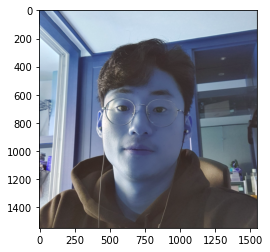

In [2]:
my_image_path = os.getenv("HOME") + "/aiffel/camera_sticker/images/image.png"
image_2_path = os.getenv("HOME") + "/aiffel/camera_sticker/images/image_2.png"
image_3_path = os.getenv("HOME") + "/aiffel/camera_sticker/images/image_3.png"
img_bgr = cv2.imread(my_image_path) 
img_bgr_2 = cv2.imread(image_2_path) 
img_bgr_3 = cv2.imread(image_3_path) 
img_show = img_bgr.copy()
img_show_2 = img_bgr_2.copy()
img_show_3 = img_bgr_3.copy()
plt.imshow(img_bgr)
plt.show()

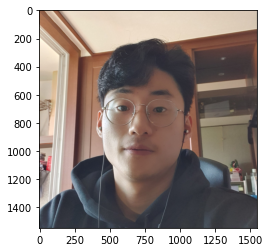

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
img_rgb_3 = cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.show()

In [4]:
detector_hog = dlib.get_frontal_face_detector()

In [5]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgb_2 = cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB)
img_rgb_3 = cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2RGB)

dlib_rects = detector_hog(img_rgb, 2)
dlib_rects_2 = detector_hog(img_rgb_2, 2)
dlib_rects_3 = detector_hog(img_rgb_3, 2)

In [6]:
for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), thickness=2 ,lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)


for dlib_rect in dlib_rects_2: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show_2, (l,t), (r,b), (0,255,0), thickness=2 ,lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
img_show_rgb_2 =  cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB)


for dlib_rect in dlib_rects_3: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show_3, (l,t), (r,b), (0,255,0), thickness=2 ,lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
img_show_rgb_3 =  cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB)

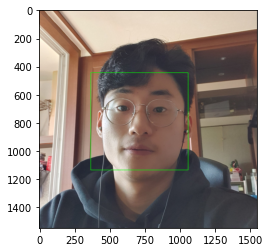

In [7]:
plt.imshow(img_show_rgb)
plt.show()

In [8]:
model_path = os.getenv("HOME") + '/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'

landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄

In [9]:
list_landmarks = []
list_landmarks_2 = []
list_landmarks_3 = []

for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장
        
for dlib_rect in dlib_rects_2:
    points = landmark_predictor(img_rgb_2, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_2.append(list_points)
        
for dlib_rect in dlib_rects_3:
    points = landmark_predictor(img_rgb_3, dlib_rect)
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks_3.append(list_points)

print(len(list_landmarks[0]))
print(len(list_landmarks_2[0]))
print(len(list_landmarks_3[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68
68
68


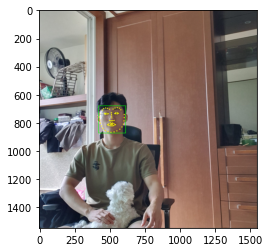

In [10]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 4, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)
            
for landmark in list_landmarks_2:
    for point in landmark:
        cv2.circle(img_show_2, point, 4, (0, 255, 255), -1)
        
for landmark in list_landmarks_3:
    for point in landmark:
        cv2.circle(img_show_3, point, 4, (0, 255, 255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
img_show_rgb_2 = cv2.cvtColor(img_show_2, cv2.COLOR_BGR2RGB)
img_show_rgb_3 = cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb_3)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

In [11]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33])
    x = landmark[30][0] # 이미지에서 코 부위의 x값
    y = landmark[30][1] # 이미지에서 코 부위의 y값 
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')
    
for dlib_rect, landmark in zip(dlib_rects_2, list_landmarks_2): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33])
    x_2 = landmark[30][0] # 이미지에서 코 부위의 x값
    y_2 = landmark[30][1] # 이미지에서 코 부위의 y값 
    w_2 = h_2 = dlib_rect.width()

for dlib_rect, landmark in zip(dlib_rects_3, list_landmarks_3): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33])
    x_3 = landmark[30][0] # 이미지에서 코 부위의 x값
    y_3 = landmark[30][1] # 이미지에서 코 부위의 y값 
    w_3 = h_3 = dlib_rect.width()

(706, 908)
(x,y) : (707,834)
(w,h) : (691,691)
(834, 849)
(515, 786)


In [12]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat.png'
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
img_sticker_2 = cv2.resize(img_sticker, (w_2,h_2))
img_sticker_3 = cv2.resize(img_sticker, (w_3,h_3))
print (img_sticker.shape)
print (img_sticker_2.shape)
print (img_sticker_3.shape)

(691, 691, 3)
(576, 576, 3)
(193, 193, 3)


In [13]:
refined_x = x - w // 2
refined_y = y - h//2

refined_x_2 = x_2 - w_2 // 2
refined_y_2 = y_2 - h_2//2

refined_x_3 = x_3 - w_3 // 2
refined_y_3 = y_3 - h_3//2
print (f'(x,y) : ({refined_x},{refined_y})')
print (f'(x,y) : ({refined_x_2},{refined_y_2})')
print (f'(x,y) : ({refined_x_3},{refined_y_3})')

(x,y) : (362,489)
(x,y) : (515,502)
(x,y) : (420,669)


In [14]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0
    
if refined_x_2 < 0: 
    img_sticker_2 = img_sticke_2r[:, -refined_x_2:]
    refined_x_2 = 0

if refined_y_2 < 0:
    img_sticker_2 = img_sticke_2r[-refined_y_2:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y_2 = 0
    
if refined_x_3 < 0: 
    img_sticker_3 = img_sticker_3[:, -refined_x_3:]
    refined_x_3 = 0

if refined_y_3 < 0:
    img_sticker_3 = img_sticker_3[-refined_y_3:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y_3 = 0

print (f'(x,y) : ({refined_x},{refined_y})')
print (f'(x,y) : ({refined_x_2},{refined_y_2})')
print (f'(x,y) : ({refined_x_3},{refined_y_3})')

(x,y) : (362,489)
(x,y) : (515,502)
(x,y) : (420,669)


In [15]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[0]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

sticker_area_2 = img_show_2[refined_y_2:refined_y_2+img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]
img_show_2[refined_y_2:refined_y_2+img_sticker_2.shape[1], refined_x_2:refined_x_2+img_sticker_2.shape[0]] = \
    np.where(img_sticker_2!=0,sticker_area_2,img_sticker_2).astype(np.uint8)

sticker_area_3 = img_show_3[refined_y_3:refined_y_3+img_sticker_3.shape[0], refined_x_3:refined_x_3+img_sticker_3.shape[1]]
img_show_3[refined_y_3:refined_y_3+img_sticker_3.shape[1], refined_x_3:refined_x_3+img_sticker_3.shape[0]] = \
    np.where(img_sticker_3!=0,sticker_area_3,img_sticker_3).astype(np.uint8)

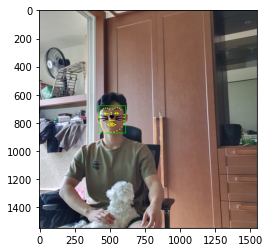

In [16]:
plt.imshow(cv2.cvtColor(img_show_3, cv2.COLOR_BGR2RGB))
plt.show()

In [17]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[1], refined_x:refined_x+img_sticker.shape[0]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)

sticker_area_2 = img_bgr_2[refined_y_2:refined_y_2 +img_sticker_2.shape[0], refined_x_2:refined_x_2+img_sticker_2.shape[1]]

img_bgr_2[refined_y_2:refined_y_2+img_sticker_2.shape[1], refined_x_2:refined_x_2+img_sticker_2.shape[0]] = \
    np.where(img_sticker_2!=0,sticker_area_2,img_sticker_2).astype(np.uint8)

sticker_area_3 = img_bgr_3[refined_y_3:refined_y_3 +img_sticker_3.shape[0], refined_x_3:refined_x_3+img_sticker_3.shape[1]]

img_bgr_3[refined_y_3:refined_y_3+img_sticker_3.shape[1], refined_x_3:refined_x_3+img_sticker_3.shape[0]] = \
    np.where(img_sticker_3!=0,sticker_area_3,img_sticker_3).astype(np.uint8)

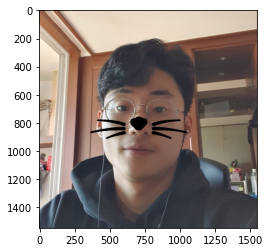

In [19]:
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

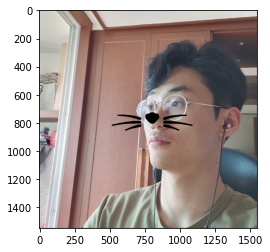

In [21]:
plt.imshow(cv2.cvtColor(img_bgr_2, cv2.COLOR_BGR2RGB))
plt.show()

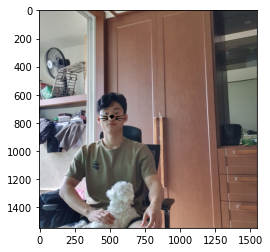

In [22]:
plt.imshow(cv2.cvtColor(img_bgr_3, cv2.COLOR_BGR2RGB))
plt.show()

---

# 회고

- 얼굴 랜드마크 Dlib landmark localization을 이용하여 사람이 눈을 감았는지 판별해 본 프로젝트는 해보았었는데 이렇게 사진 합성하는 것은 처음 해보았는데 재미있었다.
- 얼굴의 각도를 틀어서 찍어도 생각보다 잘 인식하고 위치를 장 잡았다.
- 또한 얼굴을 멀리서 찍은 사진또한 인식을 잘 하는것을 확인하였다.